# Import Package

In [1]:
# import common packages
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

# checking for CPU/GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset  & Dataloader

In [2]:
# import packages
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# pipeline

bs = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

# Arsitektur & Config

In [4]:
from jcopdl.layers import linear_block

In [5]:
# build architecture
class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation='sigmoid')
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation='sigmoid')
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [6]:
# set config
config = set_config({
    "z_size": 32,
    "batch_size": 64
})

# Training Preparation -> MCOC

In [7]:
# Model
model = AutoEncoder(config.z_size).to(device)

# Criterion
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Callback
callback = Callback(model, config, outdir="model/ae")

# Training

In [8]:
# loop func
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3366 | Test_cost  = 0.2558 | 




Epoch     2
Train_cost  = 0.1826 | Test_cost  = 0.1724 | 




Epoch     3
Train_cost  = 0.1582 | Test_cost  = 0.1510 | 




Epoch     4
Train_cost  = 0.1446 | Test_cost  = 0.1400 | 




Epoch     5
Train_cost  = 0.1347 | Test_cost  = 0.1323 | 




Epoch     6
Train_cost  = 0.1274 | Test_cost  = 0.1281 | 




Epoch     7
Train_cost  = 0.1221 | Test_cost  = 0.1231 | 




Epoch     8
Train_cost  = 0.1170 | Test_cost  = 0.1195 | 




Epoch     9
Train_cost  = 0.1140 | Test_cost  = 0.1166 | 




Epoch    10
Train_cost  = 0.1099 | Test_cost  = 0.1141 | 




Epoch    11
Train_cost  = 0.1071 | Test_cost  = 0.1122 | 




Epoch    12
Train_cost  = 0.1046 | Test_cost  = 0.1104 | 




Epoch    13
Train_cost  = 0.1029 | Test_cost  = 0.1098 | 




Epoch    14
Train_cost  = 0.1014 | Test_cost  = 0.1085 | 




Epoch    15
Train_cost  = 0.0993 | Test_cost  = 0.1073 | 




Epoch    16
Train_cost  = 0.0983 | Test_cost  = 0.1065 | 




Epoch    17
Train_cost  = 0.0962 | Test_cost  = 0.1049 | 




Epoch    18
Train_cost  = 0.0953 | Test_cost  = 0.1049 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1049




Epoch    19
Train_cost  = 0.0939 | Test_cost  = 0.1037 | 




Epoch    20
Train_cost  = 0.0927 | Test_cost  = 0.1033 | 


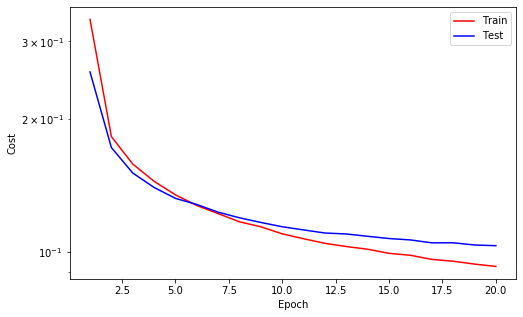



Epoch    21
Train_cost  = 0.0917 | Test_cost  = 0.1029 | 




Epoch    22
Train_cost  = 0.0906 | Test_cost  = 0.1026 | 




Epoch    23
Train_cost  = 0.0900 | Test_cost  = 0.1015 | 




Epoch    24
Train_cost  = 0.0883 | Test_cost  = 0.1013 | 




Epoch    25
Train_cost  = 0.0880 | Test_cost  = 0.1008 | 




Epoch    26
Train_cost  = 0.0874 | Test_cost  = 0.1008 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1008




Epoch    27
Train_cost  = 0.0866 | Test_cost  = 0.1003 | 




Epoch    28
Train_cost  = 0.0862 | Test_cost  = 0.1005 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1003




Epoch    29
Train_cost  = 0.0852 | Test_cost  = 0.1001 | 




Epoch    30
Train_cost  = 0.0851 | Test_cost  = 0.0997 | 




Epoch    31
Train_cost  = 0.0847 | Test_cost  = 0.1001 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0997




Epoch    32
Train_cost  = 0.0845 | Test_cost  = 0.0995 | 




Epoch    33
Train_cost  = 0.0837 | Test_cost  = 0.0992 | 




Epoch    34
Train_cost  = 0.0834 | Test_cost  = 0.0997 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0992




Epoch    35
Train_cost  = 0.0825 | Test_cost  = 0.0991 | 




Epoch    36
Train_cost  = 0.0827 | Test_cost  = 0.1003 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0991




Epoch    37
Train_cost  = 0.0826 | Test_cost  = 0.0989 | 




Epoch    38
Train_cost  = 0.0819 | Test_cost  = 0.0988 | 




Epoch    39
Train_cost  = 0.0811 | Test_cost  = 0.0980 | 




Epoch    40
Train_cost  = 0.0806 | Test_cost  = 0.0977 | 


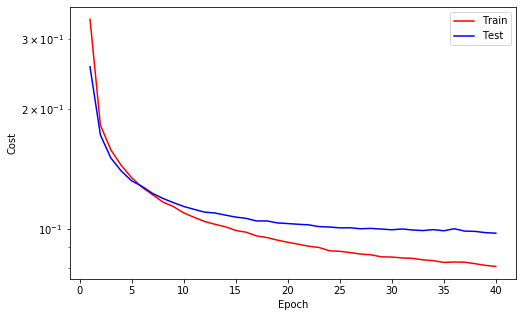



Epoch    41
Train_cost  = 0.0805 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0977




Epoch    42
Train_cost  = 0.0799 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0977




Epoch    43
Train_cost  = 0.0799 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0977




Epoch    44
Train_cost  = 0.0791 | Test_cost  = 0.0975 | 




Epoch    45
Train_cost  = 0.0786 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0975




Epoch    46
Train_cost  = 0.0791 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0975




Epoch    47
Train_cost  = 0.0790 | Test_cost  = 0.0976 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0975




Epoch    48
Train_cost  = 0.0786 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0975




Epoch    49
Train_cost  = 0.0784 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0975
==> Execute Early Stopping at epoch: 49 | Best test_cost: 0.0975
==> Best model is saved at model/ae


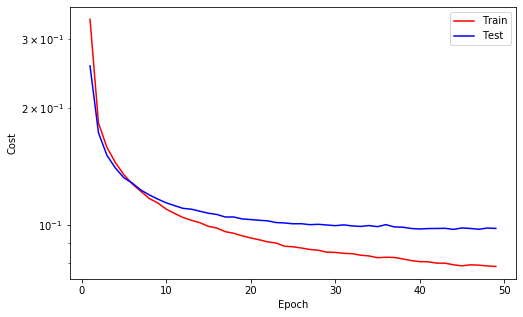

In [9]:
# training
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # Logging 
    callback.log(train_cost, test_cost)
    
    # Checkpoint
    callback.save_checkpoint()
    
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Sanity Check

In [14]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

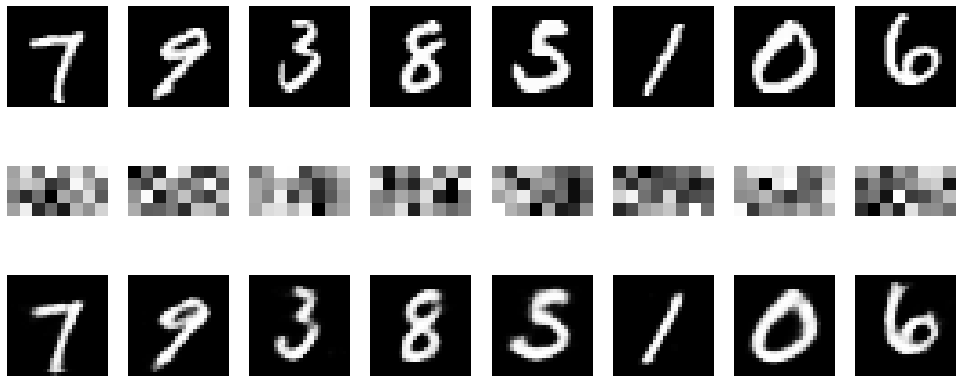

In [15]:
# visualize result
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)
        
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

# Denoising AutoEncoder

In [16]:
# func
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0., 1.)
    return images

(-0.5, 27.5, 27.5, -0.5)

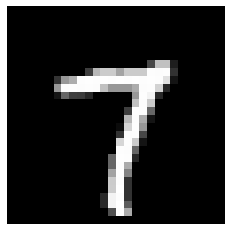

In [18]:
# data sample with noise
plt.imshow(feature[0].view(28, 28).cpu(), cmap='gray')
plt.axis('off')

# Training Preparation -> MCOC

In [16]:
# Model
model = AutoEncoder(config.z_size).to(device)

# Criterion
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Callback
callback = Callback(model, config, outdir="model/dae")

# Training

In [17]:
# loop func
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3376 | Test_cost  = 0.2604 | 




Epoch     2
Train_cost  = 0.1867 | Test_cost  = 0.1780 | 




Epoch     3
Train_cost  = 0.1630 | Test_cost  = 0.1559 | 




Epoch     4
Train_cost  = 0.1491 | Test_cost  = 0.1460 | 




Epoch     5
Train_cost  = 0.1402 | Test_cost  = 0.1390 | 




Epoch     6
Train_cost  = 0.1326 | Test_cost  = 0.1331 | 




Epoch     7
Train_cost  = 0.1272 | Test_cost  = 0.1299 | 




Epoch     8
Train_cost  = 0.1227 | Test_cost  = 0.1243 | 




Epoch     9
Train_cost  = 0.1185 | Test_cost  = 0.1222 | 




Epoch    10
Train_cost  = 0.1154 | Test_cost  = 0.1191 | 




Epoch    11
Train_cost  = 0.1126 | Test_cost  = 0.1175 | 




Epoch    12
Train_cost  = 0.1106 | Test_cost  = 0.1173 | 




Epoch    13
Train_cost  = 0.1078 | Test_cost  = 0.1151 | 




Epoch    14
Train_cost  = 0.1069 | Test_cost  = 0.1132 | 




Epoch    15
Train_cost  = 0.1040 | Test_cost  = 0.1119 | 




Epoch    16
Train_cost  = 0.1036 | Test_cost  = 0.1124 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1119




Epoch    17
Train_cost  = 0.1020 | Test_cost  = 0.1107 | 




Epoch    18
Train_cost  = 0.1007 | Test_cost  = 0.1112 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1107




Epoch    19
Train_cost  = 0.0995 | Test_cost  = 0.1092 | 




Epoch    20
Train_cost  = 0.0985 | Test_cost  = 0.1087 | 


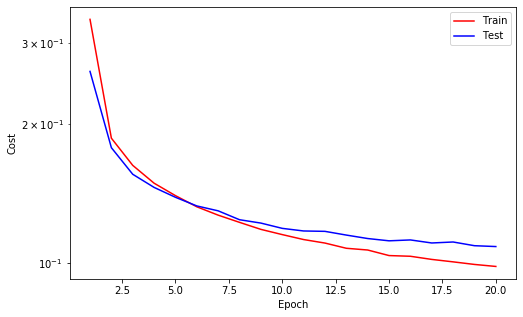



Epoch    21
Train_cost  = 0.0973 | Test_cost  = 0.1087 | 




Epoch    22
Train_cost  = 0.0962 | Test_cost  = 0.1075 | 




Epoch    23
Train_cost  = 0.0958 | Test_cost  = 0.1070 | 




Epoch    24
Train_cost  = 0.0943 | Test_cost  = 0.1070 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1070




Epoch    25
Train_cost  = 0.0939 | Test_cost  = 0.1066 | 




Epoch    26
Train_cost  = 0.0924 | Test_cost  = 0.1057 | 




Epoch    27
Train_cost  = 0.0922 | Test_cost  = 0.1059 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1057




Epoch    28
Train_cost  = 0.0923 | Test_cost  = 0.1058 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1057




Epoch    29
Train_cost  = 0.0919 | Test_cost  = 0.1060 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1057




Epoch    30
Train_cost  = 0.0913 | Test_cost  = 0.1051 | 




Epoch    31
Train_cost  = 0.0907 | Test_cost  = 0.1054 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1051




Epoch    32
Train_cost  = 0.0895 | Test_cost  = 0.1044 | 




Epoch    33
Train_cost  = 0.0896 | Test_cost  = 0.1048 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1044




Epoch    34
Train_cost  = 0.0890 | Test_cost  = 0.1046 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1044




Epoch    35
Train_cost  = 0.0880 | Test_cost  = 0.1035 | 




Epoch    36
Train_cost  = 0.0880 | Test_cost  = 0.1044 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1035




Epoch    37
Train_cost  = 0.0872 | Test_cost  = 0.1040 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1035




Epoch    38
Train_cost  = 0.0875 | Test_cost  = 0.1040 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1035




Epoch    39
Train_cost  = 0.0869 | Test_cost  = 0.1035 | 




Epoch    40
Train_cost  = 0.0864 | Test_cost  = 0.1035 | 


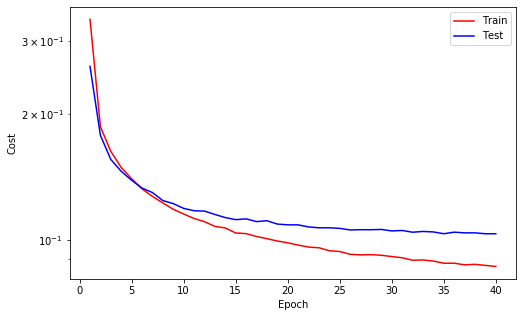



Epoch    41
Train_cost  = 0.0867 | Test_cost  = 0.1042 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1035




Epoch    42
Train_cost  = 0.0862 | Test_cost  = 0.1033 | 




Epoch    43
Train_cost  = 0.0855 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1033




Epoch    44
Train_cost  = 0.0855 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1033




Epoch    45
Train_cost  = 0.0845 | Test_cost  = 0.1032 | 




Epoch    46
Train_cost  = 0.0846 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1032




Epoch    47
Train_cost  = 0.0836 | Test_cost  = 0.1031 | 




Epoch    48
Train_cost  = 0.0844 | Test_cost  = 0.1049 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1031




Epoch    49
Train_cost  = 0.0841 | Test_cost  = 0.1036 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1031




Epoch    50
Train_cost  = 0.0833 | Test_cost  = 0.1025 | 




Epoch    51
Train_cost  = 0.0827 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1025




Epoch    52
Train_cost  = 0.0823 | Test_cost  = 0.1027 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1025




Epoch    53
Train_cost  = 0.0830 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1025




Epoch    54
Train_cost  = 0.0829 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1025




Epoch    55
Train_cost  = 0.0827 | Test_cost  = 0.1024 | 




Epoch    56
Train_cost  = 0.0817 | Test_cost  = 0.1031 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1024




Epoch    57
Train_cost  = 0.0819 | Test_cost  = 0.1023 | 




Epoch    58
Train_cost  = 0.0818 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1023




Epoch    59
Train_cost  = 0.0814 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1023




Epoch    60
Train_cost  = 0.0811 | Test_cost  = 0.1030 | 


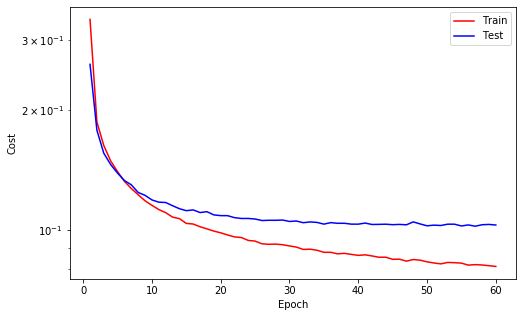

==> EarlyStop patience =  3 | Best test_cost: 0.1023




Epoch    61
Train_cost  = 0.0814 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1023




Epoch    62
Train_cost  = 0.0809 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1023
==> Execute Early Stopping at epoch: 62 | Best test_cost: 0.1023
==> Best model is saved at model/dae


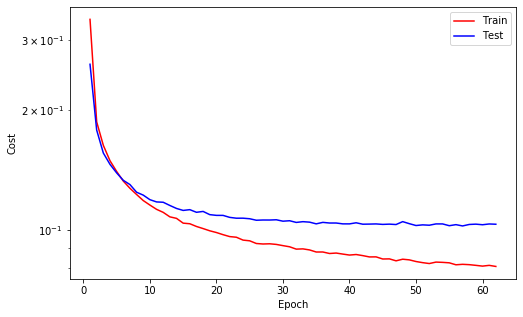

In [18]:
# training
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # Logging 
    callback.log(train_cost, test_cost)
    
    # Checkpoint
    callback.save_checkpoint()
    
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Sanity Check with Denoising

In [19]:
feature, target = next(iter(testloader))
feature = add_noise(feature.view(-1, 784).to(device))

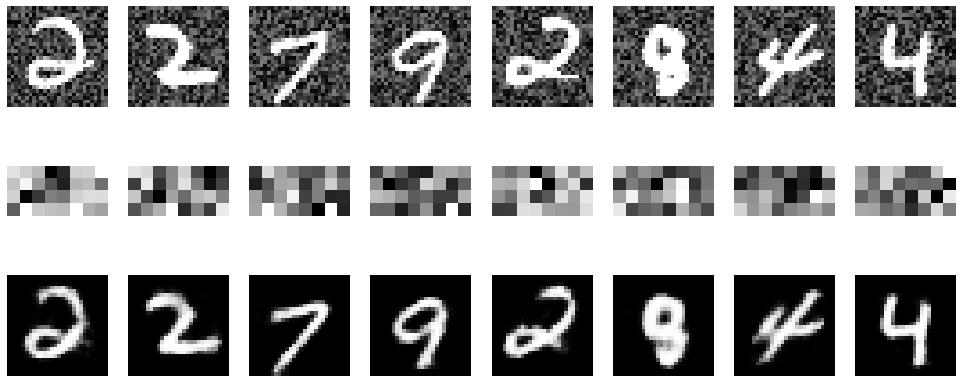

In [20]:
# visualize result
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)
        
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')